In [1]:
#https://github.com/Pyomo/PyomoGallery/blob/master/transport/transport.ipynb
#god docs^^
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyomo.environ import *

In [3]:
#year, month, day, hour3, house_id4, hourly_kwh5, hourly_solar_kwh6, hourly_gal,latitude8, longitude9, summary10, temperature11, humidity, visibility, apparent_temperature, pressure, wind_speed, cloud_cover,wind_bearing, precip_intensity, precip_probability
preprocessed_data = np.genfromtxt('../data/preprocessed_data.csv', delimiter=',', dtype = str)


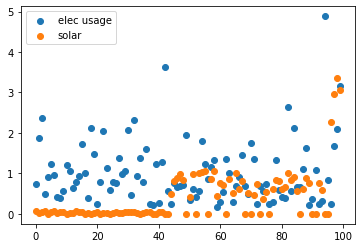

In [4]:
pre_data_s = preprocessed_data[0:10000]
x = np.arange(0,100)
lower = 2200
upper = 2300
power_usage = pre_data_s[lower:upper,5].astype(float)
power_solar = pre_data_s[lower:upper,6].astype(float)
plt.scatter(x,power_usage)
plt.scatter(x,power_solar)
plt.legend(["elec usage", "solar"])
plt.show()

In [5]:
m = ConcreteModel()
m.data_usage = power_usage
m.data_solar = power_solar
samples = len(m.data_usage)

In [6]:
# declare decision variables
m.j = range(samples)
m.x2 = Var(m.j, domain=NonNegativeReals) #second stage power
m.x1 = Var(domain=NonNegativeReals) #first stage power
# consts
c1 = 10 #cost of planned energy
c2 = 25 #cost of last minute energy

In [7]:
# declare objective
def objective_rule(model):
    second_stage = sum(model.x2[j] for j in range(0,samples))  
    return samples*c1*m.x1 + c2*second_stage
m.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')

In [8]:
# declare constraints    
def supply_rule(m, j):
    demand = m.data_usage[j] - m.data_solar[j]
    return m.x1 + m.x2[j] >= demand
m.supply = Constraint(m.j, rule=supply_rule, doc='Observe supply limit at plant i')

In [9]:
# solve
SolverFactory('gurobi').solve(m).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x102
  Lower bound: 3275.25
  Upper bound: 3275.25
  Number of objectives: 1
  Number of constraints: 101
  Number of variables: 102
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 102
  Number of nonzeros: 201
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimali

In [10]:
m.x1()

2.134

In [11]:
m.x2[:]()

[0.0,
 0.0,
 0.193,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.129,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.493,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [12]:
demand = 0
for j in range(0,100):
    no_neg_pwr = max( m.data_usage[j] - m.data_solar[j], 0)
    print(no_neg_pwr)
    #demand = demand + no_neg_pwr
print(c1*samples)

0.6650000000000001
1.864
2.327
0.421
0.9129999999999999
1.182
0.8920000000000001
0.38299999999999995
0.339
0.5199999999999999
1.216
1.022
0.621
0.724
0.904
1.666
1.0190000000000001
0.371
2.134
1.456
0.20600000000000002
0.7809999999999999
2.0260000000000002
1.115
0.595
0.765
0.7209999999999999
1.338
0.954
1.0150000000000001
2.021
0.429
2.263
0.905
1.368
0.764
1.54
0.197
0.22399999999999998
1.224
0.21700000000000003
1.237
3.627
0.5760000000000001
0
0
0
0
0
1.945
0
0
0.425
0
0.7680000000000002
0.18699999999999983
0.867
0.30699999999999994
0.26900000000000013
0
0
0
1.3630000000000002
0.15200000000000014
0
0
0.30399999999999994
0.629
0.698
0
1.743
0.8959999999999999
0
0.68
0.19899999999999995
0.20600000000000007
0.23600000000000002
0
0.48099999999999987
0
0
0
1.6159999999999997
0
1.2279999999999998
0.09900000000000009
0.669
0.501
0.7490000000000001
0
0.35700000000000004
1.08
0
0
4.8839999999999995
0.833
0
0
0
0.10999999999999988
1000


In [13]:
print(m.objective())

3275.25
